# Really simple model to test FastApi

In [21]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

import seaborn as sns

import pickle

%matplotlib inline

In [2]:
np.random.seed(1)

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [3]:
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
398,2.0,"Drew, Master. Marshall Brines",male,8.0,0.0,2.0,28220,32.5000,None,S
1307,3.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,None,C
309,1.0,"Wick, Miss. Mary Natalie",female,31.0,0.0,2.0,36928,164.8667,C7,S
1301,3.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,None,C
1048,3.0,"Nakid, Miss. Maria ('Mary')",female,1.0,0.0,2.0,2653,15.7417,None,C


#### We will keep only Class, Sex and Age

In [4]:
X_train.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'], axis=1, inplace=True)
X_test.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'], axis=1, inplace=True)

C:\Users\Adrien\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
X_train.head()

,pclass,sex,age
398,2.0,male,8.0
1307,3.0,male,27.0
309,1.0,female,31.0
1301,3.0,male,45.5
1048,3.0,female,1.0


In [9]:
X_train.sex = pd.factorize(X_train.sex)[0]
X_test.sex = pd.factorize(X_test.sex)[0]

C:\Users\Adrien\Anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
X_train.isna().sum(), X_test.isna().sum()

(pclass      0
 sex         0
 age       209
 dtype: int64, pclass     0
 sex        0
 age       54
 dtype: int64)

In [16]:
#here we avoid data leakage
X_train['age'].fillna(X_train['age'].median(), inplace = True)
X_test['age'].fillna(X_test['age'].median(), inplace = True)

C:\Users\Adrien\Anaconda3\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
clf = RandomForestClassifier()

In [17]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       162
           1       0.80      0.70      0.74       100

    accuracy                           0.82       262
   macro avg       0.81      0.79      0.80       262
weighted avg       0.82      0.82      0.81       262



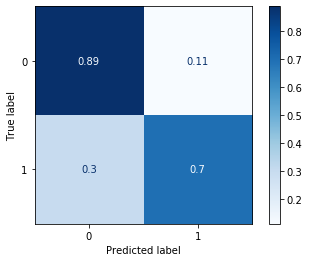

In [20]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

#### Hey that's actually not as bad as I thought it will be !

In [23]:
pickle.dump(clf, open('ReallySimpleModel.pkl', 'wb'))